<a href="https://colab.research.google.com/github/pedro1999-wolf/Boston_house_price_modelling/blob/main/Boston_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelagem de preços de casas em Boston**



O dataset **"Boston House Prices"** reúne informações detalhadas sobre os preços das casas em Boston, associando esses valores a diversas características demográficas, sociais e econômicas das regiões analisadas. O objetivo principal deste estudo é desenvolver modelos preditivos capazes de estimar o preço médio de uma residência em determinada área, utilizando atributos socioeconômicos, ambientais e habitacionais como insumos.O mercado imobiliário é amplamente influenciado por uma combinação de fatores, como qualidade de vida, proximidade a centros urbanos, infraestrutura disponível e condições ambientais. Compreender como esses elementos impactam os preços das casas é essencial para embasar decisões de planejamento urbano, formulação de políticas públicas e investimentos no setor imobiliário.

## **Atributos de entrada (features), na ordem:**

**CRIM:** Taxa de criminalidade per capita por cidade.

**ZN:** Proporção de terrenos residenciais destinados a lotes maiores que 25.000 pés quadrados.

**INDUS:** Proporção de acres de negócios não varejistas por cidade.

**CHAS:** Variável dummy para o Rio Charles (1 se o lote faz limite com o rio; 0 caso contrário).

**NOX:** Concentração de óxidos nítricos (partes por 10 milhões) [partes/10M].

**RM:** Número médio de cômodos por residência.

**AGE:** Proporção de unidades ocupadas pelos proprietários construídas antes de 1940.

**DIS:** Distâncias ponderadas até cinco centros de emprego de Boston.

**RAD:** Índice de acessibilidade às rodovias radiais.

**TAX:** Taxa de imposto sobre propriedades no valor integral por $10.000 [$ / 10k].

**PTRATIO:** Razão entre alunos e professores por cidade.

**B:** Proporção de pessoas negras por cidade.

**LSTAT:** Percentual da população de status socioeconômico mais baixo.

## **Variável de saída (target):**

**MEDV:** Valor mediano das residências ocupadas pelos proprietários em milhares de dólares [$k].

**1. Importação de pacotes**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as splot
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


**2. Importação de dados**

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/pedro1999-wolf/E-commerce-data-analysis/refs/heads/main/boston.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**3. Pré-processamento**

In [ ]:
# Preparação dos dados

# Separação em atributos (X) e classe (y)
array = dataset.values
X = array[:, 0:13]  # Seleciona a coluna 1 até a 5
y = array[:, 13]  # Seleciona a coluna 6 como target

print(dataset.dtypes)


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [ ]:
# Seleção de atributos

# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
X_trans = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', X_trans.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:13]))


Número original de atributos: 13

Número reduzido de atributos: 4

Atributos Originais: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Scores dos Atributos Originais: [3.414 1.698 2.151 1.102 2.339 2.676 2.33  1.507 1.915 2.21  1.776 1.818
 5.752]

Atributos Selecionados: ['CRIM' 'NOX' 'RM' 'LSTAT']


### **Logo, apenas os atributos CRIM, NOX, RM e LSTAT serão utilizados para modelagem, salvos em uma versão refinada de X, chamada X_trans.**

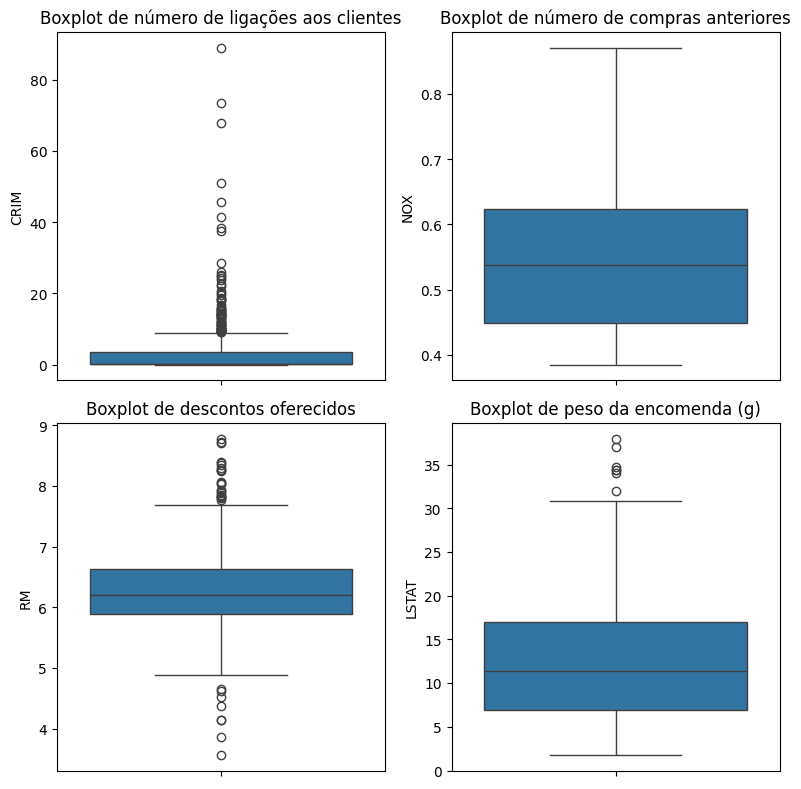

In [ ]:
# Checando a presença de outliers nos atributos selecionados

fig, ax = plt.subplots(2,2, figsize=(8,8))

splot.boxplot(dataset['CRIM'], ax=ax[0,0])
ax[0,0].set_title('Boxplot de número de ligações aos clientes')

splot.boxplot(dataset['NOX'], ax=ax[0,1])
ax[0,1].set_title('Boxplot de número de compras anteriores')

splot.boxplot(dataset['RM'], ax=ax[1,0])
ax[1,0].set_title('Boxplot de descontos oferecidos')

splot.boxplot(dataset['LSTAT'], ax=ax[1,1])
ax[1,1].set_title('Boxplot de peso da encomenda (g)')

plt.tight_layout()

plt.show()

### **Apesar da presença de outliers, optei por não excluí-los e realizar a modelagem com os dados como estão.**

In [ ]:
# Separação dos dados em treino e teste
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X_trans, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout

# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'
num_particoes = 10
kfold = KFold(n_splits=num_particoes, random_state=seed, shuffle=True) # validação cruzada

**4. Modelo**

LR-orig: MSE 28.58 (12.70) - RMSE 5.35
Ridge-orig: MSE 28.55 (12.64) - RMSE 5.34
Lasso-orig: MSE 31.74 (13.00) - RMSE 5.63
KNN-orig: MSE 15.36 (8.18) - RMSE 3.92
CART-orig: MSE 27.19 (18.06) - RMSE 5.21
SVM-orig: MSE 37.05 (19.31) - RMSE 6.09
LR-padr: MSE 28.58 (12.70) - RMSE 5.35
Ridge-padr: MSE 28.57 (12.69) - RMSE 5.34
Lasso-padr: MSE 30.25 (11.74) - RMSE 5.50
KNN-padr: MSE 14.05 (7.12) - RMSE 3.75
CART-padr: MSE 26.78 (15.61) - RMSE 5.18
SVM-padr: MSE 24.14 (12.86) - RMSE 4.91
LR-norm: MSE 28.58 (12.70) - RMSE 5.35
Ridge-norm: MSE 28.78 (12.14) - RMSE 5.37
Lasso-norm: MSE 64.73 (27.36) - RMSE 8.05
KNN-norm: MSE 13.16 (7.10) - RMSE 3.63
CART-norm: MSE 28.29 (17.29) - RMSE 5.32
SVM-norm: MSE 22.10 (11.91) - RMSE 4.70
LR-orig: R² Médio = 0.604 (+/- 0.228)
Ridge-orig: R² Médio = 0.606 (+/- 0.225)
Lasso-orig: R² Médio = 0.596 (+/- 0.128)
KNN-orig: R² Médio = 0.812 (+/- 0.057)
CART-orig: R² Médio = 0.638 (+/- 0.215)
SVM-orig: R² Médio = 0.575 (+/- 0.066)
LR-padr: R² Médio = 0.604 (+/- 0.

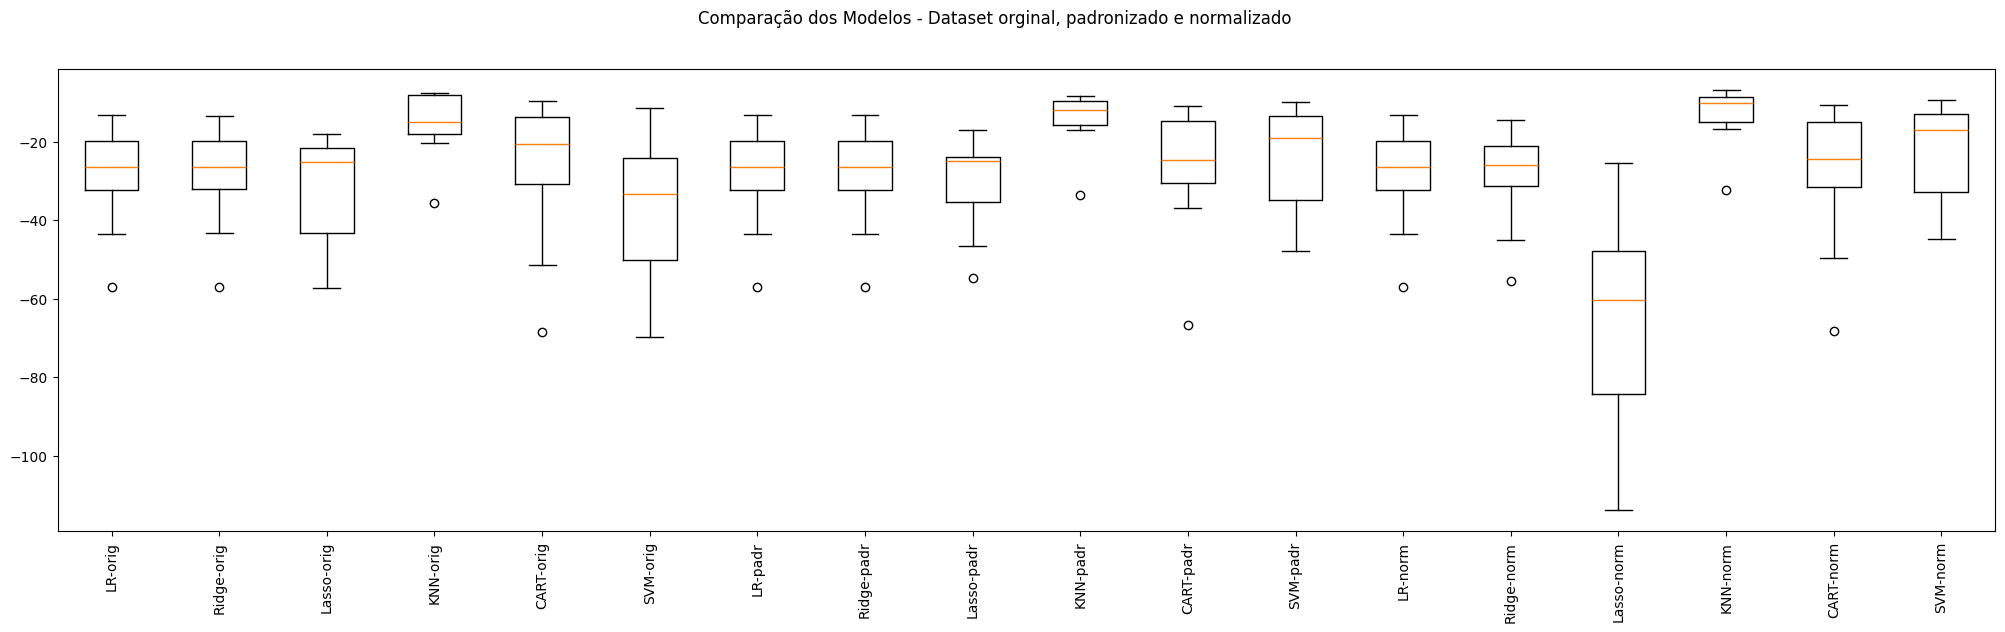

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos

pipelines = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
linear_regr = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
KNN = ('KNN', KNeighborsRegressor())
CART = ('CART', DecisionTreeRegressor())
SVM = ('SVM', SVR())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([linear_regr])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('Lasso-orig', Pipeline([lasso])))
pipelines.append(('KNN-orig', Pipeline([KNN])))
pipelines.append(('CART-orig', Pipeline([CART])))
pipelines.append(('SVM-orig', Pipeline([SVM])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler,linear_regr])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler,ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler,lasso])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler,KNN])))
pipelines.append(('CART-padr', Pipeline([standard_scaler,CART])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler,SVM])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler,linear_regr])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler,ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler,lasso])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler,KNN])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler,CART])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler,SVM])))

# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

for name, model in pipelines:
  scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
  print(f"{name}: R² Médio = {scores.mean():.3f} (+/- {scores.std():.3f})")

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### **O melhor modelo foi o KNN com os dados normalizados, logo a próxima etapa será responsável por melhorar o modelo, selecionando os melhores hiperparâmetros.**

In [ ]:
#Tunando o KNN

np.random.seed(7)  # Definindo uma semente global para este bloco

# Criando o pipeline apenas para KNN padronizado
pipeline = Pipeline(steps=[
    ('MinMaxScaler', MinMaxScaler()),  # Padronização
    ('KNN', KNeighborsRegressor())         # KNN para regressão
])

# Calculando a matriz de covariância para a métrica Mahalanobis
cov_matrix = np.cov(X_train, rowvar=False)

# Configuração dos hiperparâmetros para o GridSearch
param_grid = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],  # Número de vizinhos
    'KNN__weights': ['uniform', 'distance'],          # Peso uniforme ou baseado na distância
    'KNN__metric': ['euclidean', 'manhattan', 'minkowski'],
    'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmos disponíveis
    'KNN__leaf_size': [10, 20, 30, 40, 50, 75, 100, 150, 200],    # Tamanho da folha
    'KNN__n_jobs': [-1, 1, 2, 4, 8]
}

# Configuração do KFold e métrica para avaliação
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'neg_mean_squared_error'  # Métrica para regressão

# Preparando e executando o GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid.fit(X_train, y_train)

# Imprime a melhor configuração
print("Melhor Score: %f usando %s" % (grid.best_score_, grid.best_params_))

Melhor Score: -11.753551 usando {'KNN__algorithm': 'auto', 'KNN__leaf_size': 10, 'KNN__metric': 'manhattan', 'KNN__n_jobs': -1, 'KNN__n_neighbors': 5, 'KNN__weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### **Agora que os melhores hiperparâmetros foram selecionados, está na hora de treinar o modelo e testá-lo.**

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)  # Ajusta o scaler com o conjunto de treino
rescaledX = scaler.transform(X_train)  # Aplica a padronização no conjunto de treino
model = KNeighborsRegressor(metric='manhattan', n_neighbors= 5, weights = 'distance', algorithm= 'auto', leaf_size= 10, n_jobs= -1)
model.fit(rescaledX, y_train)  # Treina o modelo com o conjunto de treino

# Estimativa no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # Aplica a padronização no conjunto de teste
predictions = model.predict(rescaledTestX)  # Faz previsões no conjunto de teste

# Métricas de avaliação
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Exibindo os resultados
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 20.77536458948821
RMSE: 4.558000064665227
R²: 0.742899070371962


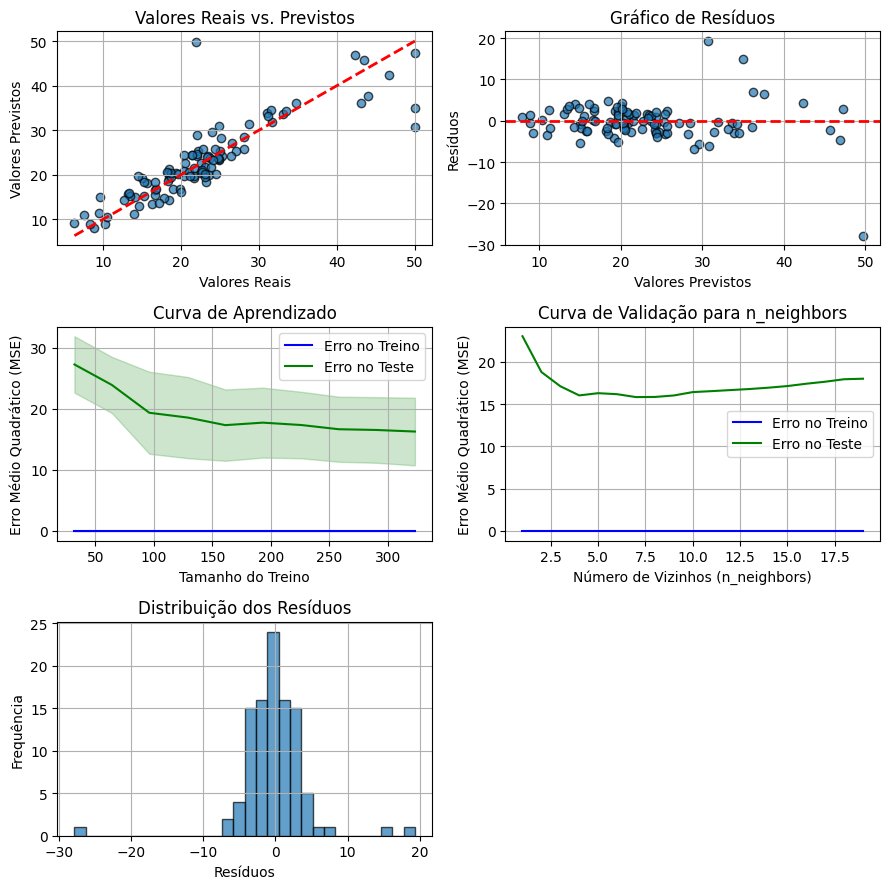

In [ ]:
# Gráficos avaliando o desempenho do modelo

fig, ax = plt.subplots(3, 2, figsize=(9, 9))  # Criar uma figura com 3 linhas e 2 colunas

# 1. Valores Reais vs. Previstos
ax[0, 0].scatter(y_test, predictions, alpha=0.7, edgecolors='k')
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha ideal
ax[0, 0].set_title('Valores Reais vs. Previstos')
ax[0, 0].set_xlabel('Valores Reais')
ax[0, 0].set_ylabel('Valores Previstos')
ax[0, 0].grid(True)

# 2. Gráfico de Resíduos
residuals = y_test - predictions
ax[0, 1].scatter(predictions, residuals, alpha=0.7, edgecolors='k')
ax[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
ax[0, 1].set_title('Gráfico de Resíduos')
ax[0, 1].set_xlabel('Valores Previstos')
ax[0, 1].set_ylabel('Resíduos')
ax[0, 1].grid(True)

# 3. Curva de Aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
ax[1, 0].plot(train_sizes, train_scores_mean, label='Erro no Treino', color='blue')
ax[1, 0].plot(train_sizes, test_scores_mean, label='Erro no Teste', color='green')
ax[1, 0].fill_between(train_sizes,
                      train_scores_mean - np.std(train_scores, axis=1),
                      train_scores_mean + np.std(train_scores, axis=1), color='blue', alpha=0.2)
ax[1, 0].fill_between(train_sizes,
                      test_scores_mean - np.std(test_scores, axis=1),
                      test_scores_mean + np.std(test_scores, axis=1), color='green', alpha=0.2)
ax[1, 0].set_title('Curva de Aprendizado')
ax[1, 0].set_xlabel('Tamanho do Treino')
ax[1, 0].set_ylabel('Erro Médio Quadrático (MSE)')
ax[1, 0].legend()
ax[1, 0].grid(True)

# 4. Curva de Validação
param_range = range(1, 20)
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5, scoring='neg_mean_squared_error'
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
ax[1, 1].plot(param_range, train_scores_mean, label='Erro no Treino', color='blue')
ax[1, 1].plot(param_range, test_scores_mean, label='Erro no Teste', color='green')
ax[1, 1].set_title('Curva de Validação para n_neighbors')
ax[1, 1].set_xlabel('Número de Vizinhos (n_neighbors)')
ax[1, 1].set_ylabel('Erro Médio Quadrático (MSE)')
ax[1, 1].legend()
ax[1, 1].grid(True)

# 5. Distribuição dos Resíduos
ax[2, 0].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
ax[2, 0].set_title('Distribuição dos Resíduos')
ax[2, 0].set_xlabel('Resíduos')
ax[2, 0].set_ylabel('Frequência')
ax[2, 0].grid(True)

# Remover o último subplot vazio (opcional)
fig.delaxes(ax[2, 1])  # Remove o último subplot vazio

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

## **Os gráficos de desempenho nos mostram que:**

### **1. As previsões estão próximas dos valores reais.**

### **2. Resíduos não apresentam padrões claros.**

### **3. Curvas de aprendizado mostram um modelo equilibrado sem sinais claros de overfitting ou underfitting.**

### **4. Distribuição dos resíduos é centrada e simétrica, indicando que os erros são bem distribuídos.**

In [ ]:
# Treinar o modelo com TODO o dataset
scaler = MinMaxScaler().fit(X_trans) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_trans) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsRegressor(leaf_size=10, metric='manhattan', n_jobs=-1,
                    weights='distance')

In [ ]:
# Novos dados - não sabemos a classe!
data = {'CRIM': [0.0072	, 0.034, 0.045, 0.051, 0.012],
        'NOX': [0.32, 0.43, 0.48, 0.51, 0.35],
        'RM': [6.575, 6.421, 7.185, 6.998, 7.147],
        'LSTAT': [5.43, 8.62, 3.63, 2.51, 6.57],
        }

atributos = ['CRIM', 'NOX', 'RM', 'LSTAT']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 9.891e-06 -1.337e-01  5.775e-01  1.021e-01]
 [ 3.111e-04  9.259e-02  5.480e-01  1.901e-01]
 [ 4.348e-04  1.955e-01  6.944e-01  5.243e-02]
 [ 5.022e-04  2.572e-01  6.586e-01  2.152e-02]
 [ 6.384e-05 -7.202e-02  6.871e-01  1.336e-01]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[26.9   24.3   34.506 31.496 30.92 ]


In [ ]:
# Salvando modelo
dump(model, "Boston_KNN.joblib")

['Boston_KNN.joblib']

### **Concluindo, A melhor solução encontrada foi o modelo KNN com dados normalizados, utilizando o MinMaxScaler para ajustar os dados entre 0 e 1. O modelo foi configurado com os hiperparâmetros otimizados via GridSearchCV, incluindo n_neighbors=5, métrica de distância Manhattan, pesos baseados na distância, e tamanho de folha igual a 10. Avaliado no conjunto de teste, o modelo apresentou um MSE de 22.77, RMSE de 4.55 e um R² de 0.74, demonstrando bom ajuste com capacidade preditiva consistente e ausência de sinais claros de overfitting.**